## Heart Disease Prediction 

##### 1. Age : Umaar
##### 2. Sex : Gender
##### 3. CP: Chest pain type (4 values)
##### 4. Resting blood pressure
##### 5. Serum cholestoral in mg/dl
##### 6. Fasting blood sugar > 120 mg/dl
##### 7. Resting electrocardiographic results (values 0,1,2)
##### 8. Maximum heart rate achieved
##### 9. Exercise induced angina
##### 10. Oldpeak = ST depression induced by exercise relative to rest
##### 11. The slope of the peak exercise ST segment
##### 12. Number of major vessels (0-3) colored by flourosopy
##### 13. Thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
##### The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [14]:
data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data.notnull().sum()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.shape

(1025, 14)

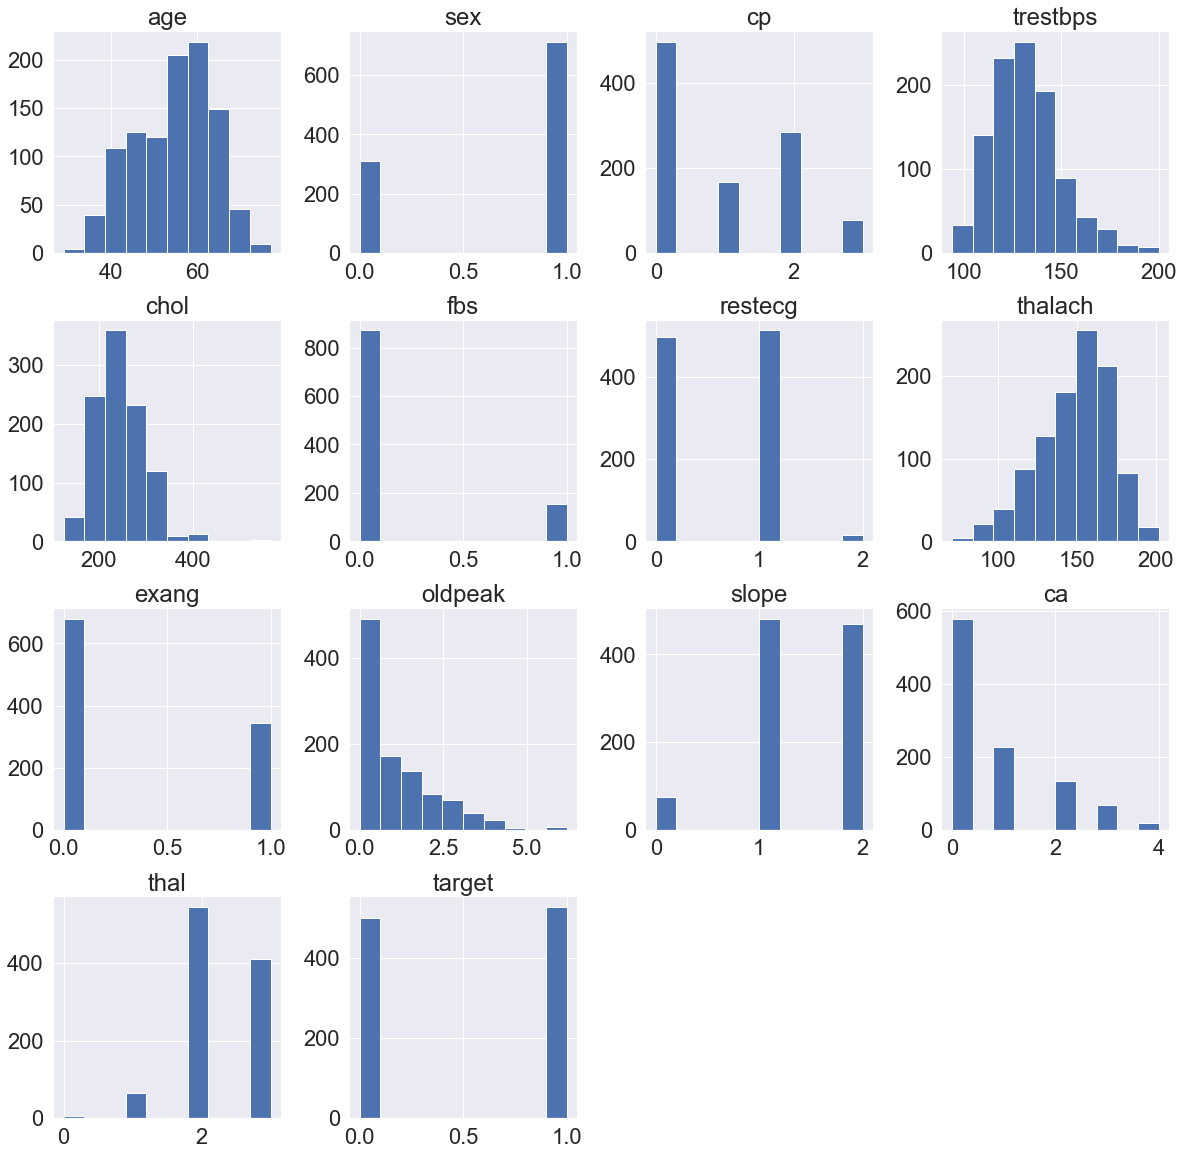

In [15]:
sns.set(font_scale=2) # to enlarge font size
data.hist(figsize=(20,20)) # for every column
plt.show()

In [16]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

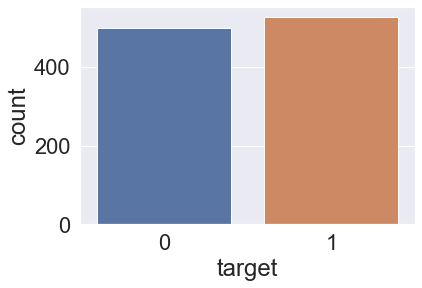

In [17]:
sns.countplot(x='target', data=data)

In [18]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

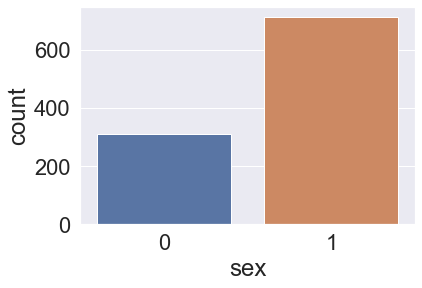

In [19]:
sns.countplot(x='sex',data=data)

In [20]:
arr = data.groupby("sex")
arr2 = arr["target"].value_counts()
arr3 = pd.DataFrame(arr2)
arr3.head(n=1000)

target
sex target        
0   1          226
    0           86
1   0          413
    1          300

In [21]:
data.groupby("sex")["target"].value_counts()


sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: target, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

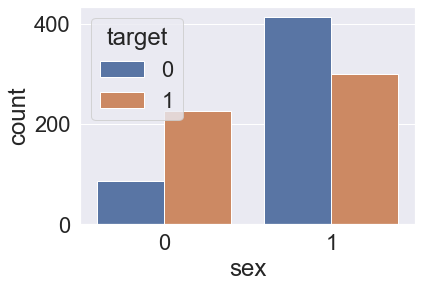

In [23]:
# hue : (optional) This parameter take column name for colour encoding
sns.countplot(x="sex", hue='target', data=data)


In [24]:
data.groupby("age")["target"].value_counts()

age  target
29   1          4
34   1          6
35   1          8
     0          7
37   1          6
               ..
70   1          3
71   1         11
74   1          3
76   1          3
77   0          3
Name: target, Length: 75, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

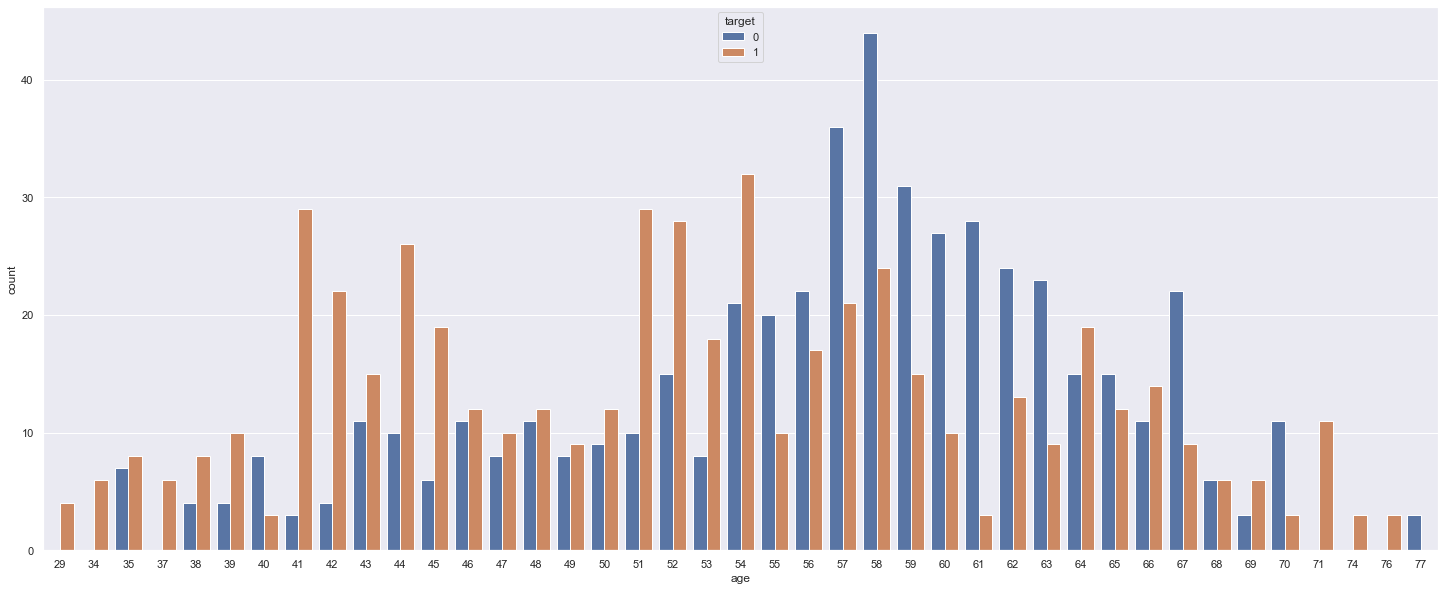

In [50]:
plt.figure(figsize=(25,10)) # to change figure size
sns.countplot(x="age", hue='target', data=data)


## Enumerate

In [31]:
a = ['eat','sleep','repeat']
ans = enumerate(a) # return tuple
print(a)
print(list(ans)) 

['eat', 'sleep', 'repeat']
[(0, 'eat'), (1, 'sleep'), (2, 'repeat')]


In [44]:
b= "Sahil"
ans= enumerate(b,100) # 100 is index
print(list(ans))

[(100, 'S'), (101, 'a'), (102, 'h'), (103, 'i'), (104, 'l')]


In [40]:
categorical_values = list(data.columns)

In [41]:
categorical_values

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [42]:
categorical_values.remove("target")

In [43]:
categorical_values

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

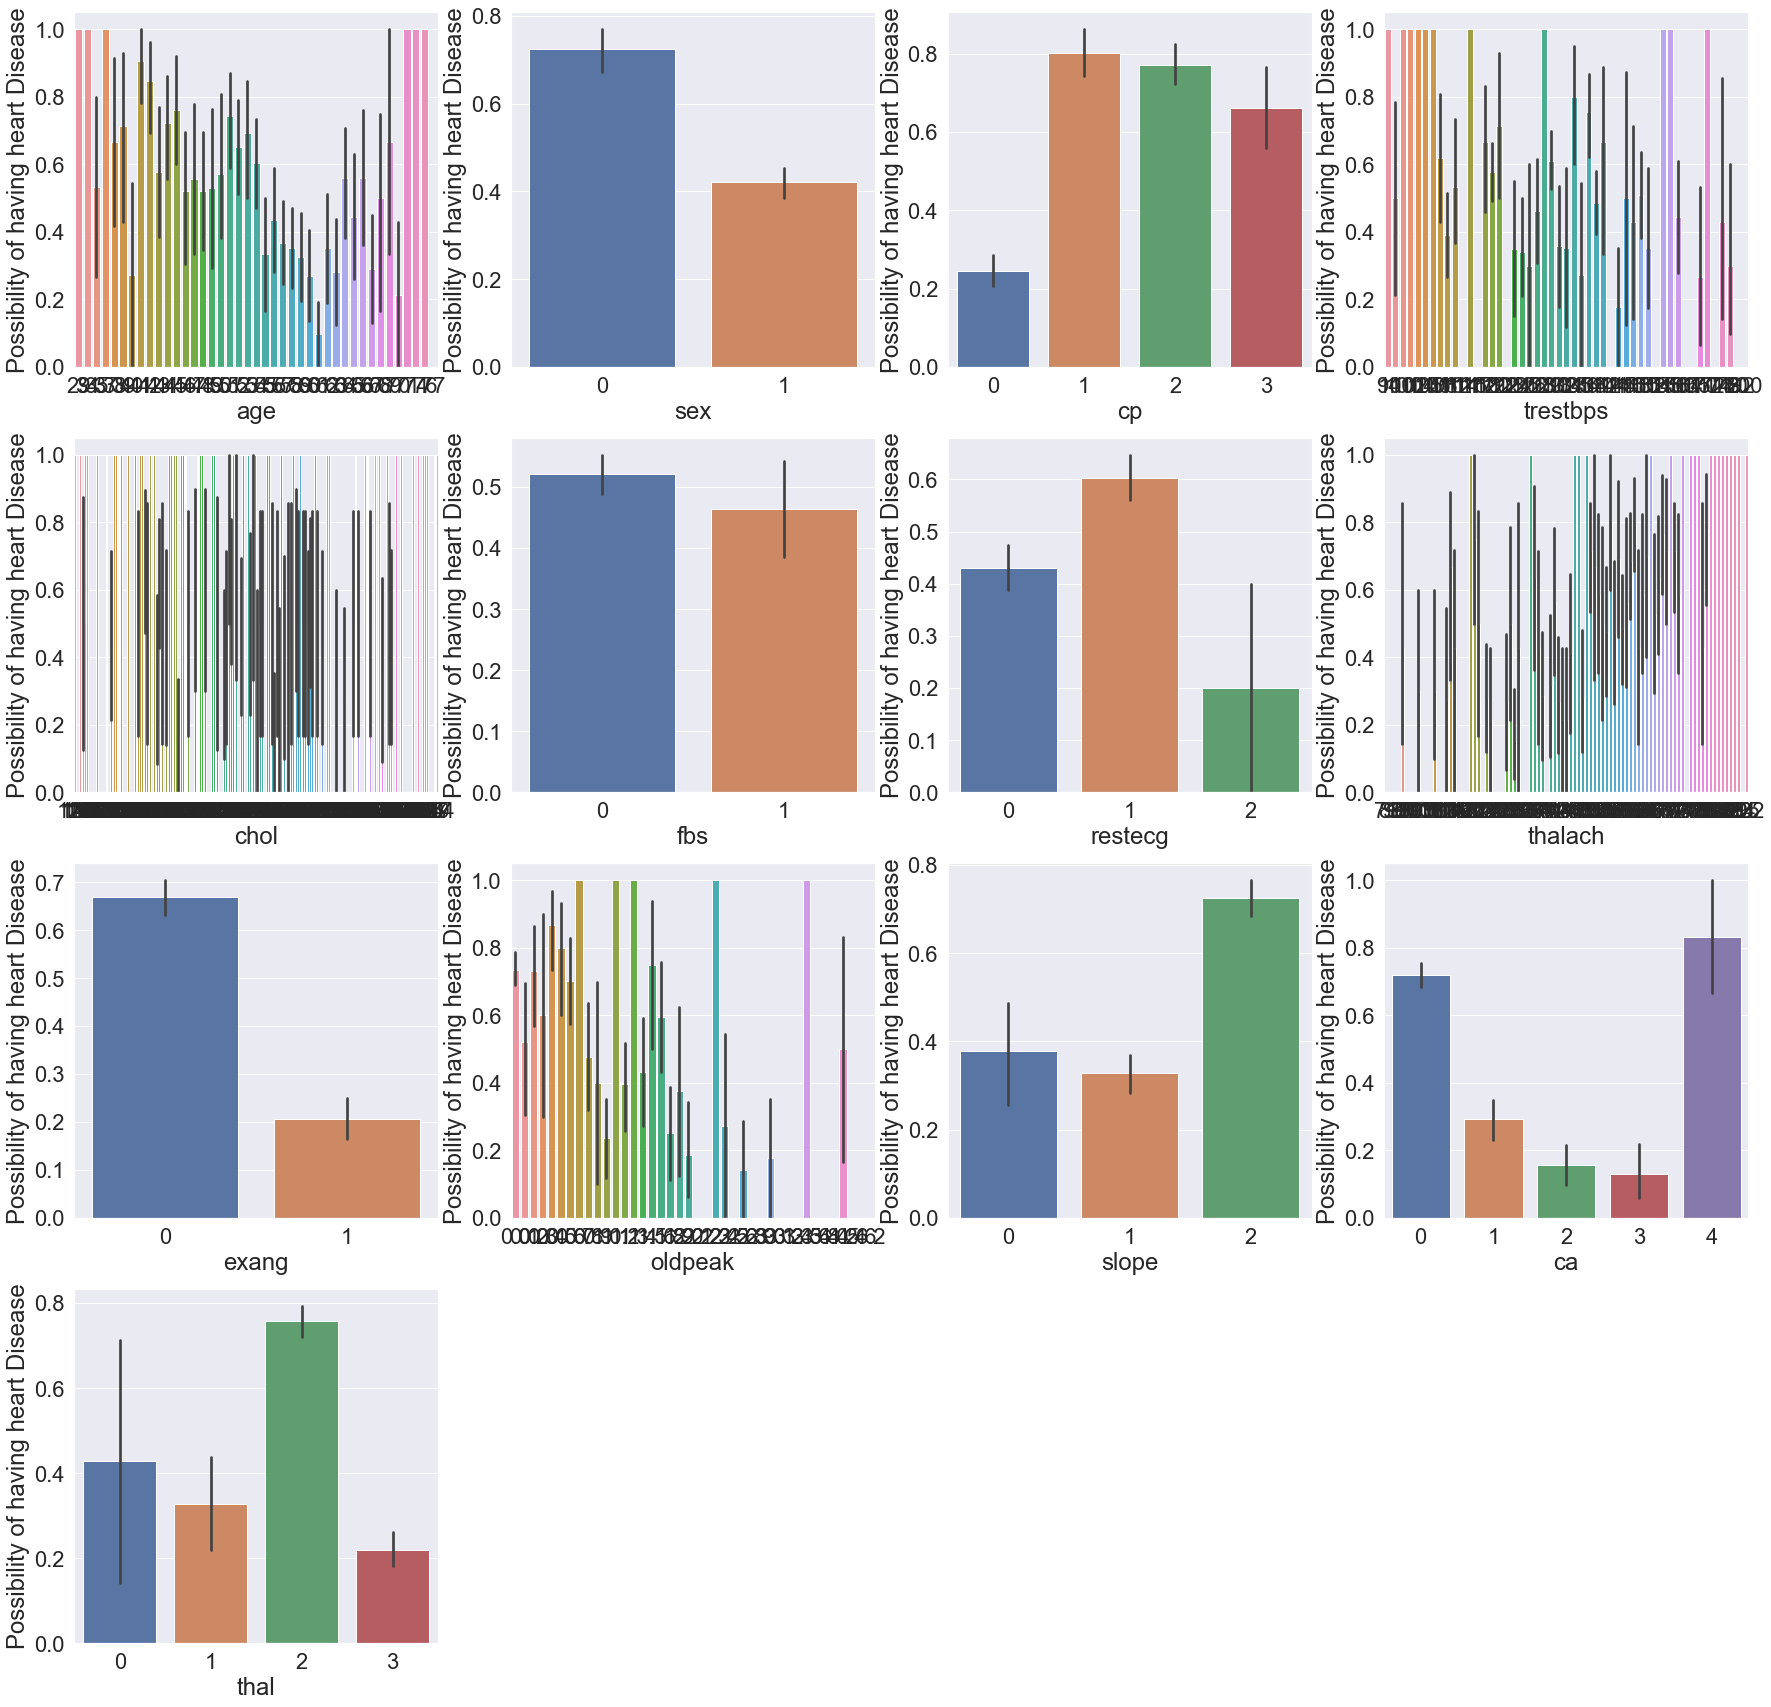

In [46]:
plt.figure(figsize=(30,30))

for i,col in enumerate(categorical_values,1):
    plt.subplot(4,4,i)
    sns.barplot(x=f"{col}",y="target",data=data)
    plt.ylabel("Possibility of having heart Disease")
    plt.xlabel(f"{col}")